# 1. Significant earthquakes since 2150 B.C.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'  
plt.rcParams['font.serif'] = ['Times New Roman']

Sig_Eqs = pd.read_csv('earthquakes-2024-11-01_10-28-41_+0800.tsv', sep='\t')
#Sig_Eqs.to_csv('data.csv')
#print(Sig_Eqs)

## 1.1

In [2]:
#每个国家由于地震死亡的人数
tDeath_each_group = Sig_Eqs.groupby(['Country']).sum().sort_values('Deaths', ascending=False)['Deaths']
#print(tDeath_each_group)
#tDeath_each_group.head(20).to_csv('test.csv')
print(tDeath_each_group.head(20))

Country
CHINA           2075947.0
TURKEY          1188881.0
IRAN            1011453.0
ITALY            498418.0
SYRIA            439224.0
HAITI            323478.0
AZERBAIJAN       317219.0
JAPAN            279607.0
ARMENIA          191890.0
PAKISTAN         145083.0
IRAQ             136200.0
ECUADOR          135496.0
TURKMENISTAN     117412.0
PERU             102169.0
ISRAEL            90388.0
PORTUGAL          83572.0
GREECE            80378.0
CHILE             64277.0
INDIA             63507.0
TAIWAN            57153.0
Name: Deaths, dtype: float64


## 1.2

Text(0, 0.5, 'Number of earthquakes')

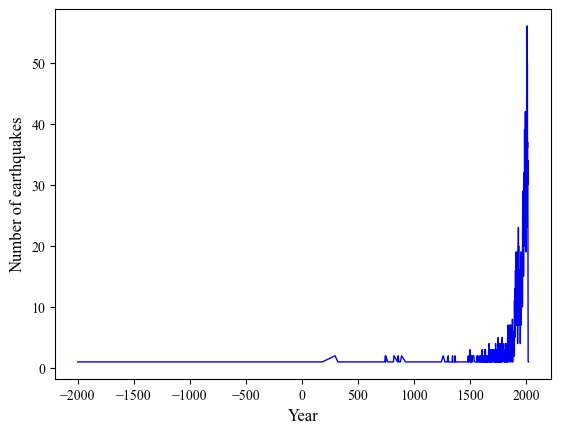

In [3]:
large_earthquakes = Sig_Eqs.loc[Sig_Eqs['Ms']>3.0].groupby(['Year']).count()
#large_earthquakes.to_csv('test.csv')
plt.plot(large_earthquakes['Ms'], 'b', linewidth = 1.0)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of earthquakes', fontsize=12)

## 1.3

In [4]:
def CountEq_LargestEq(country_name):
    def get_largest(x):
        df = x.sort_values('Ms', ascending=False)
        return df.iloc[0, :]
    
    total_earthquakes = Sig_Eqs.groupby(['Country']).count()
    #total_earthquakes.to_csv('test.csv')
    num_coutry_earthquakes = int(total_earthquakes['Id'][country_name])
    #print(num_coutry_earthquakes)
    largest_earthquake = Sig_Eqs.groupby(['Country']).apply(get_largest, include_groups=False).fillna(0)
    #largest_earthquake.to_csv('test1.csv')
    location_coutry_earthquakes = '%i-%i-%i, Location: %s, lat: %.2f, lon: %.2f'%(
        largest_earthquake['Year'][country_name],
        largest_earthquake['Mo'][country_name],
        largest_earthquake['Dy'][country_name],
        largest_earthquake['Location Name'][country_name],
        largest_earthquake['Latitude'][country_name],
        largest_earthquake['Longitude'][country_name]
    )
    return [num_coutry_earthquakes, location_coutry_earthquakes]
    
#print(CountEq_LargestEq('CHINA'))

Country_df = Sig_Eqs.groupby(['Country']).count().sort_values('Id', ascending=False).index
result = [CountEq_LargestEq(i) for i in Country_df]
#为了看得更清楚我逐个输出了
for i in result:
    print(i)

[623, '1920-12-16, Location: CHINA:  GANSU PROVINCE, SHANXI PROVINCE, lat: 36.60, lon: 105.32']
[419, '869-7-13, Location: JAPAN:  SANRIKU, lat: 38.50, lon: 143.80']
[412, '2004-12-26, Location: INDONESIA:  SUMATRA:  ACEH:  OFF WEST COAST, lat: 3.29, lon: 95.98']
[386, '856-12-22, Location: IRAN:  DAMGHAN, QUMIS, lat: 36.20, lon: 54.30']
[337, '1939-12-26, Location: TURKEY:  ERZINCAN, lat: 39.91, lon: 39.59']
[333, '1915-1-13, Location: ITALY:  MARSICA, AVEZZANO, ABRUZZI, lat: 42.00, lon: 13.50']
[278, '1957-3-9, Location: ALASKA, lat: 51.50, lon: -175.63']
[273, '1303-8-8, Location: GREECE:  CRETE, lat: 35.00, lon: 27.00']
[226, '1897-9-21, Location: PHILIPPINES:  MINDANAO, ZAMBOANGA, SULU, ISABELA, lat: 6.00, lon: 122.00']
[212, '1787-3-28, Location: MEXICO:  SAN MARCOS, OAXACA, lat: 16.50, lon: -98.50']
[199, '1730-7-8, Location: CHILE:  VALPARAISO, lat: -32.50, lon: -71.50']
[190, '1619-2-14, Location: PERU:  TRUJILLO, PIURA, SANTA, lat: -7.94, lon: -79.04']
[155, '1952-11-4, Locat

# 2. Air temperature in Shenzhen during the past 25 years

(0.0, 35.0)

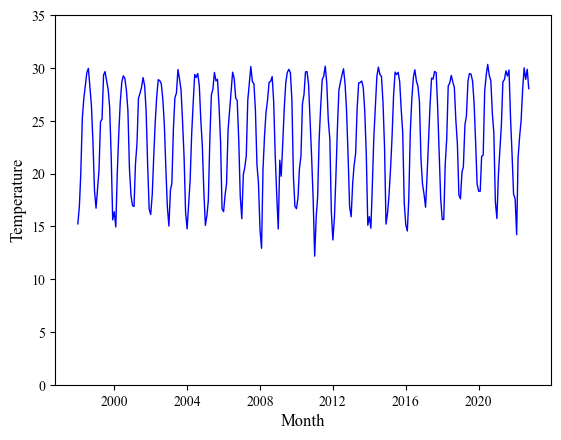

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'  
plt.rcParams['font.serif'] = ['Times New Roman']

#整理数据
raw_data = pd.read_csv('Baoan_Weather_1998_2022.csv', low_memory=False)
#print(raw_data.columns)
data_rawtime = raw_data[['DATE','TMP']]
data_month = data_rawtime.copy()
data_month['Month'] = data_month['DATE'].str[:7]
data_month['Tmp'] = data_month['TMP'].apply(lambda x:int(x[:5])/10)
data_error = data_month[(data_month['Tmp']>61.8) | (data_month['Tmp']<-93.2)]
#print(data_error)
#清除异常值
data_filter = data_month.drop(data_error.index)
#print(data.head(20))
data = data_filter[['Month','Tmp']]
data_monthMean = data.groupby(['Month'], as_index=False).mean()
data_monthMean['Month'] = data_monthMean['Month'].apply(pd.to_datetime)

#print(type(data_month['TMP'][0]))
#.apply(pd.to_datetime)
#print(data_monthMean.head(20))

#绘图代码
plt.plot(data_monthMean['Month'], data_monthMean['Tmp'], 'b', linewidth = 1.0)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.ylim(0, 35)

# 3. Global collection of hurricanes

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'  
plt.rcParams['font.serif'] = ['Times New Roman']

'''df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17), #读取前n列
                 skiprows=[1, 2], #跳过第1行和第2行（从0开始计数）
                 parse_dates=['ISO_TIME'], #将ISO_TIME列的数据转换为时间类型
                 na_values=['NOT_NAMED', 'NAME'], #所有值为NOT_NAMED或NAME会转化为NaN
                 low_memory=False
                )
df.head()'''

a = 1

## 3.1

In [7]:
df1 = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(11),
                 skiprows=[1], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'], 
                 low_memory=False
                 )

#试了好久才发现这个值是字符串，我真是服了
df1['WMO_WIND'] = pd.to_numeric(df1['WMO_WIND'], errors='coerce')

def get_largest(x):
    DF = x.sort_values('WMO_WIND', ascending=False)
    #print(DF)
    return DF.iloc[0, :]

df1_SID = df1.groupby(['SID']).apply(get_largest, include_groups=False).sort_values('WMO_WIND', ascending=False)
print(df1_SID[['NAME', 'WMO_WIND']].head(10))

                   NAME  WMO_WIND
SID                              
2015293N13266  PATRICIA     185.0
1980214N11330     ALLEN     165.0
2005289N18282     WILMA     160.0
1997253N12255     LINDA     160.0
1988253N12306   GILBERT     160.0
1935241N23291       NaN     160.0
2019236N10314    DORIAN     160.0
2009288N07267      RICK     155.0
1998295N12284     MITCH     155.0
2017242N16333      IRMA     155.0


## 3.2

Text(0, 0.5, 'Wind speed')

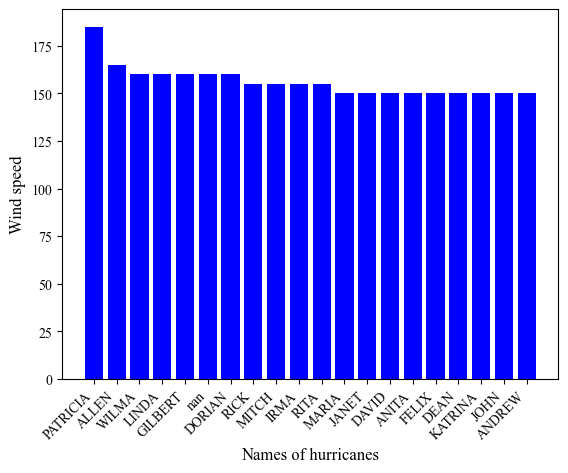

In [8]:
x = df1_SID['NAME'].head(20).astype(str)
y = df1_SID['WMO_WIND'].head(20)
plt.bar(x, y, color='b') 
plt.xticks(rotation=45, ha='right')
plt.xlabel('Names of hurricanes', fontsize=12)
plt.ylabel('Wind speed', fontsize=12)

## 3.3

BASIN
EP     62412
NI     55402
SA       119
SI    160668
SP     67119
WP    236576
Name: SID, dtype: int64


Text(0, 0.5, 'Count of datapoints')

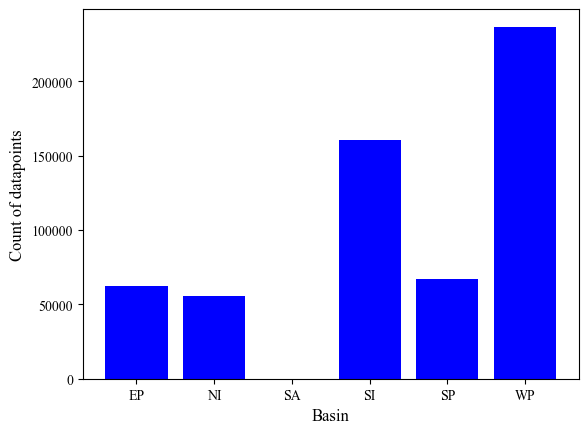

In [9]:
df3 = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(4),
                 skiprows=[1],
                 low_memory=False
                 )
#print(df3.head(10))

datapoint_count = df3.groupby(['BASIN']).count()['SID']
print(datapoint_count)
plt.bar(datapoint_count.index, datapoint_count, color='b')
plt.xlabel('Basin', fontsize=12)
plt.ylabel('Count of datapoints', fontsize=12)

## 3.4

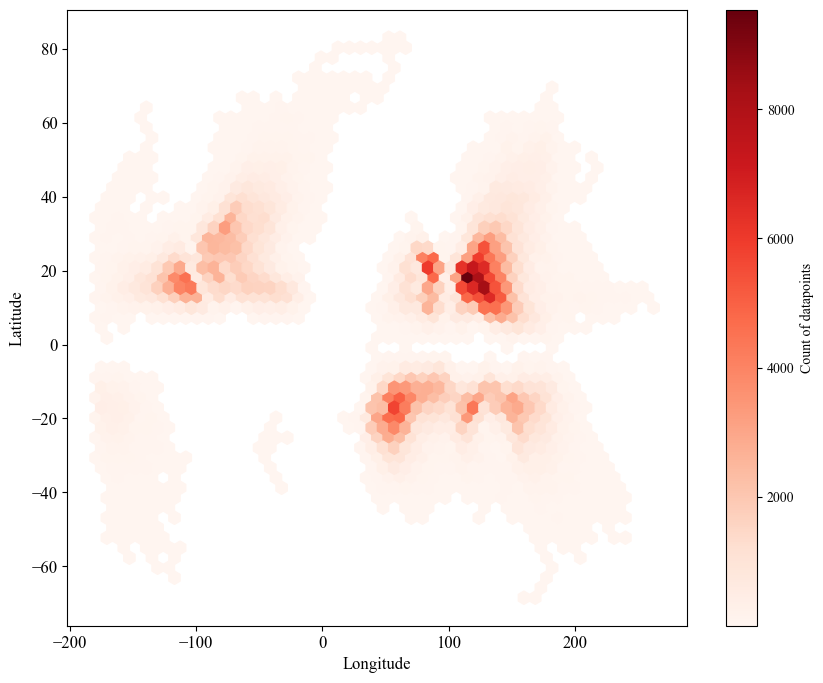

In [10]:
df4 = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(10),
                 skiprows=[1], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'], 
                 low_memory=False
                 )

#print(type(df4['LAT'][0]))
plt.figure(figsize=(10, 8))
plt.hexbin(df4['LON'], df4['LAT'], gridsize=50, cmap='Reds', mincnt=1)

plt.tick_params(labelsize=12, labelfontfamily='Times New Roman')
plt.xlabel('Longitude', fontsize=12)  
plt.ylabel('Latitude', fontsize=12)
cb = plt.colorbar(label='Count of datapoints')

## 3.5

            LAT      LON
683019  11.8000  170.200
683020  11.9275  169.745
683021  12.0000  169.225
683022  12.0302  168.564
683023  12.0875  167.875
...         ...      ...
683113  23.7000  107.150
683114  23.9355  106.434
683115  23.9400  105.600
683116  24.0212  104.778
683117  24.1000  103.900

[99 rows x 2 columns]


Text(0, 0.5, 'Latitude')

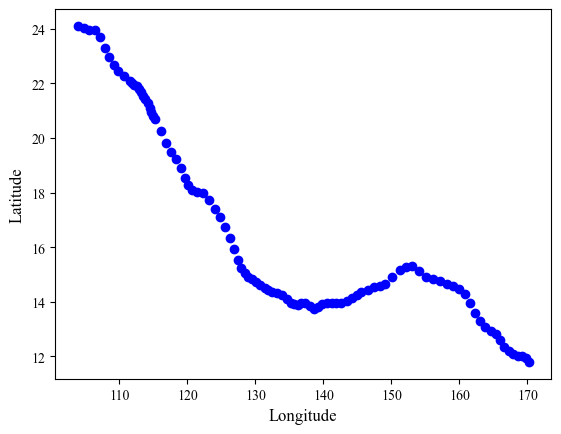

In [11]:
trace_Mangkhut = df4.groupby('NAME').get_group('MANGKHUT')
trace_Mangkhut_2018 = trace_Mangkhut.groupby('SEASON').get_group(2018)[['LAT', 'LON']]

print(trace_Mangkhut_2018)
plt.scatter(trace_Mangkhut_2018['LON'], trace_Mangkhut_2018['LAT'], color = 'b')
plt.xlabel('Longitude', fontsize=12)  
plt.ylabel('Latitude', fontsize=12)

## 3.6

In [12]:
df6 = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(7),
                 skiprows=[1], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'], 
                 low_memory=False
                 )

WP = df6.groupby('BASIN').get_group('WP')
EP = df6.groupby('BASIN').get_group('EP')
WP_EP = pd.concat([WP, EP])
df_filtered = WP_EP[WP_EP['ISO_TIME']>= pd.Timestamp('1970-01-01')]
#df_filtered.to_csv('test.csv')
print(df_filtered.head(10))

                  SID  SEASON  NUMBER BASIN SUBBASIN   NAME  \
350394  1970050N07151    1970      22    WP       MM  NANCY   
350395  1970050N07151    1970      22    WP       MM  NANCY   
350396  1970050N07151    1970      22    WP       MM  NANCY   
350397  1970050N07151    1970      22    WP       MM  NANCY   
350398  1970050N07151    1970      22    WP       MM  NANCY   
350399  1970050N07151    1970      22    WP       MM  NANCY   
350400  1970050N07151    1970      22    WP       MM  NANCY   
350401  1970050N07151    1970      22    WP       MM  NANCY   
350402  1970050N07151    1970      22    WP       MM  NANCY   
350403  1970050N07151    1970      22    WP       MM  NANCY   

                  ISO_TIME  
350394 1970-02-19 00:00:00  
350395 1970-02-19 03:00:00  
350396 1970-02-19 06:00:00  
350397 1970-02-19 09:00:00  
350398 1970-02-19 12:00:00  
350399 1970-02-19 15:00:00  
350400 1970-02-19 18:00:00  
350401 1970-02-19 21:00:00  
350402 1970-02-20 00:00:00  
350403 1970-02-2

## 3.7

Text(0, 0.5, 'Count of datapoints')

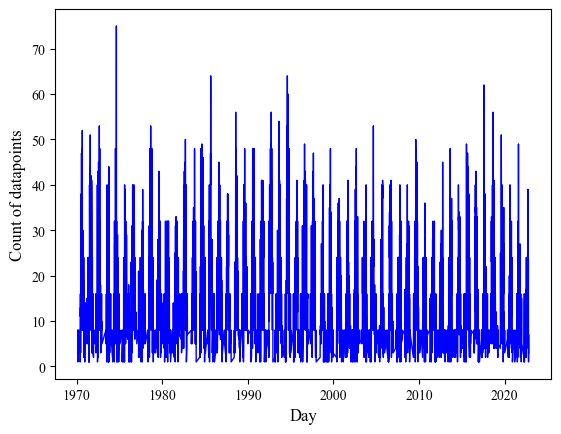

In [13]:
df7 = df_filtered.copy()
df7['DAY'] = df7['ISO_TIME'].dt.floor('D')
#print(df7.head(10))
df7_day = df7.groupby('DAY').count()['SID']
#df7_day.to_csv('test1.csv')

plt.plot(df7_day, 'b', linewidth=1.0)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Count of datapoints', fontsize=12)

## 3.8

D
1      7.545455
2      8.000000
3      6.727273
4      7.750000
5      8.750000
         ...   
362    8.315789
363    6.947368
364    8.000000
365    8.454545
366    6.500000
Name: SID, Length: 366, dtype: float64


(0.0, 366.0)

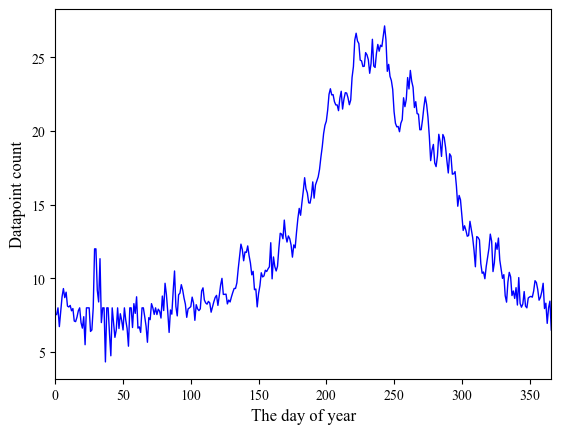

In [14]:
df8 = df_filtered.copy()
df8['DAY'] = df8['ISO_TIME'].dt.floor('D')
df8_day = df8.groupby('DAY', as_index=False).count()
#print(df8_day)
df8_day['D'] = df8_day['DAY'].dt.dayofyear
df8_perday = df8_day.groupby('D').mean()['SID']
#df8_perday.to_csv('test1.csv')
print(df8_perday)

plt.plot(df8_perday, 'b', linewidth=1.0)
plt.xlabel('The day of year', fontsize=12)
plt.ylabel('Datapoint count', fontsize=12)
plt.xlim(0,366)

## 3.9

             DAY  SID_x  SEASON  NUMBER  BASIN  SUBBASIN  NAME  ISO_TIME    D  \
0     1970-02-19      8       8       8      8         8     8         8   50   
1     1970-02-20      8       8       8      8         8     8         8   51   
2     1970-02-21      8       8       8      8         8     8         8   52   
3     1970-02-22      8       8       8      8         8     8         8   53   
4     1970-02-23      8       8       8      8         8     8         8   54   
...          ...    ...     ...     ...    ...       ...   ...       ...  ...   
10812 2022-10-04      9       9       9      9         9     9         9  277   
10813 2022-10-05      7       7       7      7         7     7         7  278   
10814 2022-10-09      1       1       1      1         1     1         1  282   
10815 2022-10-10      7       7       7      7         7     7         7  283   
10816 2022-10-12      3       3       3      3         3     0         3  285   

           SID_y    ANOMALY

Text(0, 0.5, 'Datapoint count')

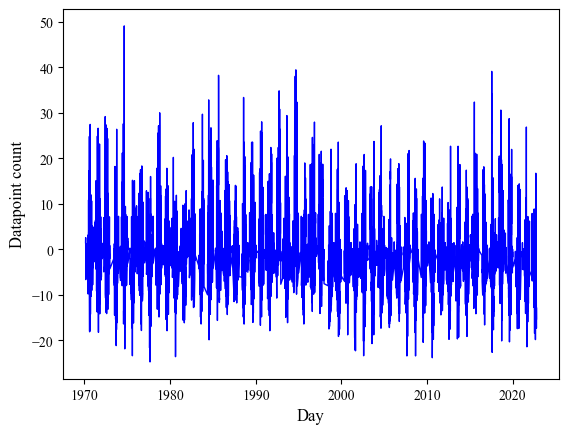

In [15]:
df9 = df8_day.copy()
df9_mean = df9.groupby('D').mean()['SID']
df9 = df9.merge(df9_mean, on='D', how='left')
df9['ANOMALY'] = df9['SID_x'] - df9['SID_y']
#df9.to_csv('test1.csv')
print(df9)

plt.plot(df9['DAY'], df9['ANOMALY'], 'b', linewidth=1.0)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Datapoint count', fontsize=12)

## 3.10

       SID      ANOMALY
YEAR                   
1970  3555   227.603774
1971  4459  1131.603774
1972  3952   624.603774
1973  2407  -920.396226
1974  3581   253.603774
1975  2686  -641.396226
1976  3341    13.603774
1977  2441  -886.396226
1978  4123   795.603774
1979  3199  -128.396226
1980  3009  -318.396226
1981  3076  -251.396226
1982  3941   613.603774
1983  3230   -97.396226
1984  3742   414.603774
1985  4279   951.603774
1986  4136   808.603774
1987  3217  -110.396226
1988  3244   -83.396226
1989  3978   650.603774
1990  4462  1134.603774
1991  3955   627.603774
1992  5002  1674.603774
1993  4141   813.603774
1994  4952  1624.603774
1995  3166  -161.396226
1996  4232   904.603774
1997  4556  1228.603774
1998  2307 -1020.396226
1999  2455  -872.396226
2000  2955  -372.396226
2001  2888  -439.396226
2002  3096  -231.396226
2003  2862  -465.396226
2004  3450   122.603774
2005  2657  -670.396226
2006  3109  -218.396226
2007  2405  -922.396226
2008  2639  -688.396226
2009  3464   136

(1970.0, 2022.0)

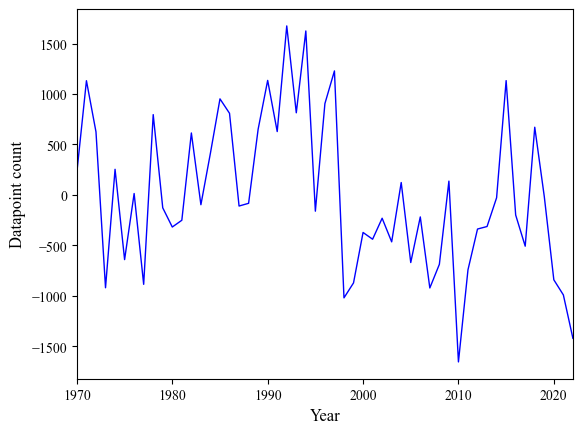

In [16]:
df10 = df8_day.copy()
df10['YEAR'] = df10['DAY'].dt.year
df10_year = df10[['SID','YEAR']].groupby('YEAR').sum()
df10_year['ANOMALY'] = df10_year['SID'] - df10_year['SID'].mean()
print(df10_year)

plt.plot(df10_year.index, df10_year['ANOMALY'], 'b', linewidth=1.0)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Datapoint count', fontsize=12)
plt.xlim(1970, 2022)

# 4. Explore a data set

## 4.1

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('72412003872.csv',
                 usecols=range(11),
                 parse_dates=['DATE'],
                 na_values=['30s'], 
                 low_memory=False
                 )

df = df.dropna()
df = df.drop_duplicates()
df.head(10)

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature
0,72412003872,2010-01-01 00:42:00,37.78359,-81.12283,760.2,"BECKLEY RALEIGH CO AIRPORT, WV US",FM-16,7,29.99,32.0,34.0
1,72412003872,2010-01-01 00:51:00,37.78359,-81.12283,760.2,"BECKLEY RALEIGH CO AIRPORT, WV US",FM-15,7,29.99,32.0,34.0
2,72412003872,2010-01-01 00:58:00,37.78359,-81.12283,760.2,"BECKLEY RALEIGH CO AIRPORT, WV US",FM-16,7,29.99,32.0,34.0
4,72412003872,2010-01-01 01:23:00,37.78359,-81.12283,760.2,"BECKLEY RALEIGH CO AIRPORT, WV US",FM-16,7,29.98,32.0,34.0
5,72412003872,2010-01-01 01:32:00,37.78359,-81.12283,760.2,"BECKLEY RALEIGH CO AIRPORT, WV US",FM-16,7,29.98,32.0,34.0
6,72412003872,2010-01-01 01:39:00,37.78359,-81.12283,760.2,"BECKLEY RALEIGH CO AIRPORT, WV US",FM-16,7,29.98,30.0,34.0
7,72412003872,2010-01-01 01:46:00,37.78359,-81.12283,760.2,"BECKLEY RALEIGH CO AIRPORT, WV US",FM-16,7,29.99,30.0,34.0
8,72412003872,2010-01-01 01:51:00,37.78359,-81.12283,760.2,"BECKLEY RALEIGH CO AIRPORT, WV US",FM-15,7,29.98,31.0,33.0
9,72412003872,2010-01-01 02:01:00,37.78359,-81.12283,760.2,"BECKLEY RALEIGH CO AIRPORT, WV US",FM-16,7,29.99,30.0,34.0
10,72412003872,2010-01-01 02:22:00,37.78359,-81.12283,760.2,"BECKLEY RALEIGH CO AIRPORT, WV US",FM-16,7,29.99,30.0,34.0


## 4.2

            HourlyDewPointTemperature
D                                    
2010-01-01                  22.733333
2010-01-02                   6.490000
2010-01-03                   1.738095
2010-01-04                   8.984615
2010-01-05                  10.078947
2010-01-06                  11.937500
2010-01-07                  16.148936
2010-01-08                   3.840580
2010-01-09                   8.900000
2010-01-10                   6.676471
2010-01-11                   9.666667
2010-01-12                  14.227273
2010-01-13                  14.148148
2010-01-14                  13.000000
2010-01-15                  24.500000
2010-01-16                  30.208333
2010-01-17                  37.019608
2010-01-18                  35.307692
2010-01-19                  36.102564
2010-01-20                  40.554054


Text(0, 0.5, 'Average daily dew point temperature')

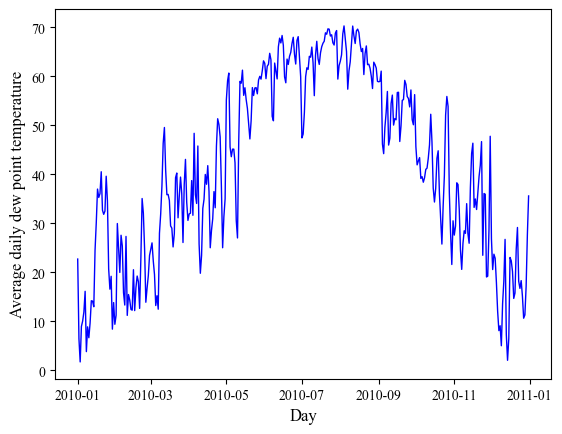

In [18]:
df2 = df.copy()
df2['D'] = df2['DATE'].dt.floor('D')
df_day = df2[['HourlyDewPointTemperature', 'D']].groupby('D').mean()
print(df_day.head(20))

plt.plot(df_day, 'b', linewidth=1.0)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Average daily dew point temperature', fontsize=12)

## 4.3

In [19]:
df_day_tmp = df2.copy()[['HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'D']].groupby('D').mean()
df_day_tmp.describe()

,HourlyDewPointTemperature,HourlyDryBulbTemperature
count,365.000000,365.000000
mean,41.346942,51.385674
std,18.652939,18.939197
min,1.738095,9.023810
25%,26.037037,35.714286
50%,40.554054,55.041667
75%,59.125000,68.458333
max,70.319149,78.208333
